##### Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


###### Understanding the data

In [2]:
df = pd.read_csv("TelcoCustomerChurn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

###### Data Cleaning

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)


In [8]:
# Here we have converted the values of the target variable "Churn" into binary values.

df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})


In [13]:
print(df['Churn'].value_counts())


print(df['Churn'].isna().sum())


0    5163
1    1869
Name: Churn, dtype: int64
0


###### Feature Engineering

In [14]:
# Dropping irrelevant column

df.drop('customerID',axis=1, inplace= True)


In [15]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

As we can see Churn is not in the column

In [17]:
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


In [18]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As all values are zero ,we can proceed with the train-test split.

###### Train-Test Split

In [19]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [20]:
df['Churn'].value_counts(dropna=False)


0    5163
1    1869
Name: Churn, dtype: int64

###### Feature Scaling

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


###### Train Models

In [22]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)


In [23]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


###### Model Evaluation

In [24]:
def evaluate_model(y_test, preds):
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print(classification_report(y_test, preds))


In [26]:
evaluate_model(y_test, lr_preds)



Accuracy: 0.7938877043354655
Precision: 0.6242603550295858
Recall: 0.5641711229946524
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



In [27]:
evaluate_model(y_test, rf_preds)

Accuracy: 0.7818052594171997
Precision: 0.6151202749140894
Recall: 0.4786096256684492
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



###### Confusion Matrix

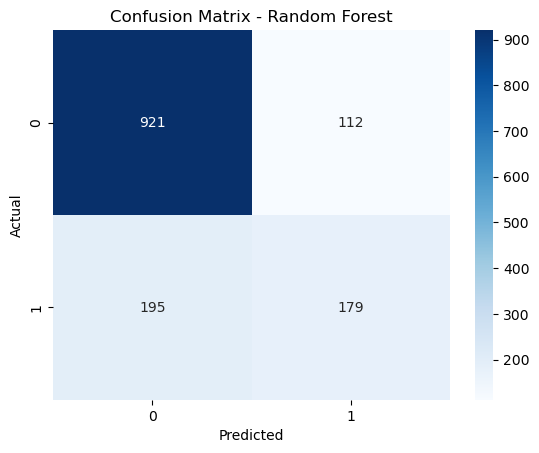

In [28]:
cm = confusion_matrix(y_test, rf_preds)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


###### Churn Probability

In [30]:
churn_prob = rf.predict_proba(X_test)[:,1]

churn_df = pd.DataFrame({
    'Actual_Churn': y_test.values,
    'Churn_Probability': churn_prob
})

churn_df.head()


,Actual_Churn,Churn_Probability
0,0,0.000000
1,0,0.770000
2,0,0.010000
3,1,0.028286
4,0,0.100000


###### Feature Importance

In [32]:
importance = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)


,Feature,Importance
18,TotalCharges,0.184908
17,MonthlyCharges,0.177222
4,tenure,0.159101
14,Contract,0.083028
16,PaymentMethod,0.050095
8,OnlineSecurity,0.048429
11,TechSupport,0.041551
0,gender,0.028497
7,InternetService,0.028416
9,OnlineBackup,0.028212


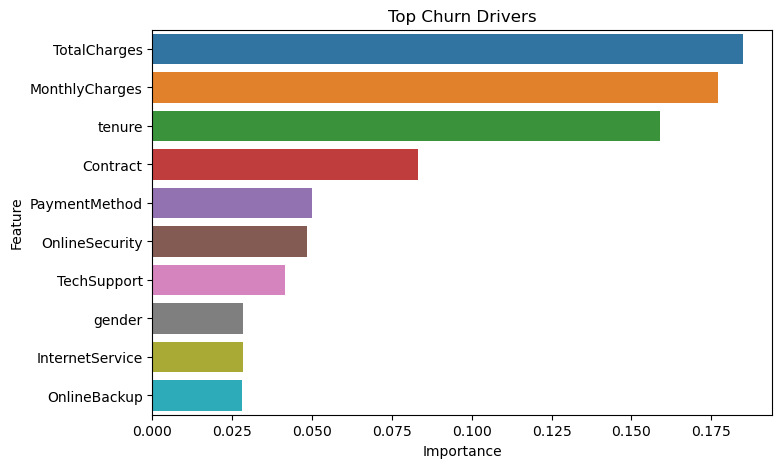

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title("Top Churn Drivers")
plt.show()


###### Exporting Files for PowerBI

In [34]:
feature_importance_df.to_csv("feature_importance.csv", index=False)
churn_df.to_csv("churn_predictions.csv", index=False)


In [35]:
import streamlit as st

st.title("Customer Churn Prediction")

prob = rf.predict_proba([[...features...]])[0][1]
st.write("Churn Probability:", prob)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (4245246452.py, line 5)